In [340]:
import torch 
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [341]:
data = pd.read_csv("cancer.csv")

In [342]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [344]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [345]:
data.shape

(569, 33)

In [346]:
data.drop([data.columns[-1]],axis=1,inplace=True)

In [347]:
data.drop(["id"],axis=1,inplace=True)

In [348]:
Y = data['diagnosis']
data.drop(["diagnosis"],axis=1,inplace=True)

In [349]:
train_x,test_x,train_y,test_y=train_test_split(data,Y,test_size=0.1,random_state=42)

In [350]:
train_x.shape , test_x.shape , train_y.shape , test_y.shape

((512, 30), (57, 30), (512,), (57,))

#changing test_y and train_y from string to 1 and 0 representing M and B respectively

In [351]:
train_y=np.where(train_y.values=="M",1,0)
test_y=np.where(test_y.values=="M",1,0)

In [352]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


scaling every coloumn of data

In [353]:
sca = StandardScaler()

In [367]:
sca.fit(data)

StandardScaler()

In [355]:
train_x = sca.transform(train_x)
test_x = sca.transform(test_x)     

In [356]:
pd.DataFrame(test_x).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
1,1.366877,0.470149,1.302886,1.351264,-0.446227,-0.027309,0.241064,0.789060,-0.838325,-1.160679,...,1.779007,0.147012,1.746605,1.732277,-0.572873,-0.131459,-0.016736,0.978975,-0.565828,-1.000578
2,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,0.435855,-0.685782,...,0.619345,0.052562,0.525386,0.484159,0.974533,-0.094562,0.512911,0.560244,-0.103143,-0.208132
3,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
4,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403


converting numpy array into tensor

In [357]:
train_x= torch.tensor(train_x).float()
test_x= torch.tensor(test_x).float()
train_y= torch.tensor(train_y).float()
test_y= torch.tensor(test_y).float()

In [358]:
class LR(nn.Module):
    def __init__(self,n_features):
        super(LR,self).__init__()
        self.layer1=nn.Linear(n_features,1)
        self.sig=nn.Sigmoid()
    def forward(self,x):
        out0 = self.layer1(x)
        out1 = self.sig(out0)
        return out1  

In [359]:
model = LR(30)

In [360]:
loss_fn = nn.BCELoss()
optimizer =  torch.optim.SGD(model.parameters() , lr =0.001)

In [361]:
num_eps=1000
train_loss = []
test_loss = []
for epoch in range(num_eps):
    output = model(train_x)
    loss = loss_fn(output.squeeze() ,train_y)
    train_loss.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        output=model(test_x)
        loss = loss_fn(output.squeeze(),test_y)
        test_loss.append(loss.detach().numpy())
        
     

Text(0, 0.5, 'Loss')

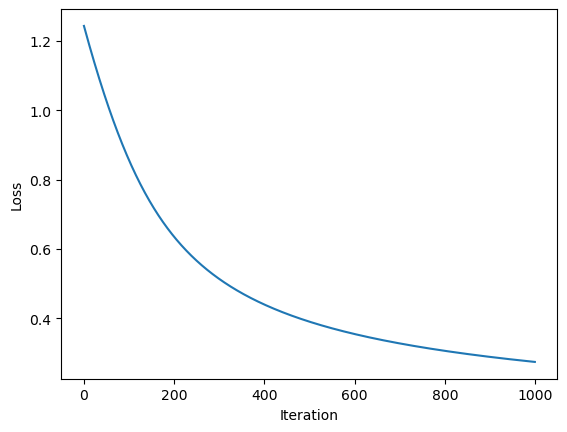

In [362]:
plt.plot(train_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

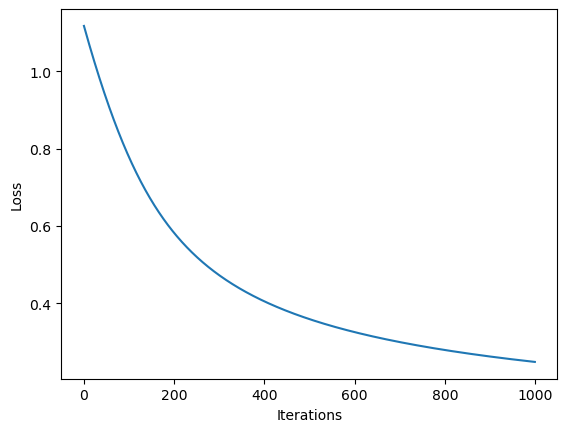

In [363]:
plt.plot(test_loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

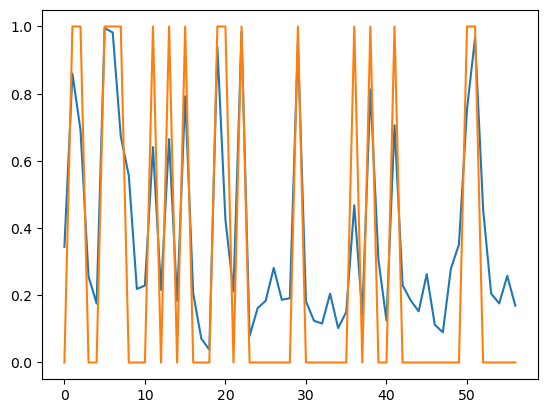

In [377]:
plt.plot(output)
plt.plot(test_y)
plt.show()
#graph of predicted y and test y